# **CSCE 5218 / CSCE 4930 Deep Learning**
## Varsha Paka
# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-18 08:02:12--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-18 08:02:12 (130 MB/s) - ‘test.dat’ saved [2844/2844]

--2024-02-18 08:02:12--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0.001s  

2024-02-18 08:02:12 (17.1 MB/s) - ‘train.dat’ saved [11244/11244]



In [ ]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [2]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    return sum(x * y for x, y in zip(array1, array2))


def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weights, instance):
    return sigmoid(dot_product(weights, instance))


# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    correct = sum(1 if predict(weights, instance) == instance[-1] else 0 for instance in instances)
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
    weights = [0] * (len(instances[0]) - 1)

    for _ in range(epochs):
        for instance in instances:
            in_value = dot_product(weights, instance)
            output_val = sigmoid(in_value)
            error = instance[-1] - output_val
            for i in range(0, len(weights)):
                weights[i] += lr * error * output_val * (1 - output_val) * instance[i]

    return weights

# Example usage:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Run it

In [3]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.

# New Section

### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
The code fragment is essential because it is crucial to the perceptron training process; therefore, calculating the output function through the sigmoid function allows for the continuous-valued output and provides the exact, constant feedback that can be useful to tune the weights by the magnitude of the differences. The fundamental problem with the prediction function is that it returns the binary predictions without considering the real-life diversity to optimize the network. The mini-batch technique resolves the issue by using the variation in output as information for the update. The sigmoid function's porous structure displays the perceptron learning's iterative nature through the successive repetitions of the model parameters re-evaluation that better fits the data and optimizes the output more.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [5]:
# Load the training and test datasets
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# Define the hyperparameters to be tested
tr_percent = [5, 10, 25, 50, 75, 100]  # Percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]      # Number of epochs
lr_array = [0.005, 0.01, 0.05]         # Learning rates

# Loop over each combination of hyperparameters
for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            # Calculate the size of the training dataset based on the percentage
            size = round(len(instances_tr) * tr_size / 100)
            # Select a subset of instances for training
            pre_instances = instances_tr[0:size]
            # Train the perceptron with the current hyperparameters
            weights = train_perceptron(pre_instances, lr, epochs)
            # Calculate the accuracy on the test dataset
            accuracy = get_accuracy(weights, instances_te)
            # Print the results for this combination of hyperparameters
            print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)
A. On training the perceptron with different parts of the training dataset, it is observed that using the entire training data only sometimes results in the highest accuracy on the test data. The plot demonstrates that the particular mixes of the hyperparameters, like a moderate amount of the training data set and a sufficient amount of the epochs, yield a higher accuracy than implementing the entire dataset. This means that training with a part of the data is enough to get a good accuracy concerning a test data set while using a complete data set, which may only sometimes be a requirement.

B. The accuracy level drop when a large quantity of data is processed for the second run can be explained by different reasons. First, increasing the size of the training data set may lead to more noise or false positive information being added, which decreases the model's performance on general classification. Further, a higher step size (0.05) in the second run can result in oscillations and instability, thus making the model converge poorly and accurately.

C. Might taking the accuracy higher than 80.0% with some additional hyperparameters be equally dependent on the complexity, the choice of features and the intrinsic limits for the given perceptron model? Learning from the different combinations of hyperparameters we try, we must reflect on the tradeoff between model complexity and generalization. While in some cases, using more advanced machine learning methods such as perceptron models is necessary to achieve higher accuracy, especially for complex datasets with nonlinear dependencies get a higher level of accuracy, these methods might be insufficient.

D. Just because the other parameters are stable or transient, it might not be worth training for more epochs constantly. Learning for additional epochs may result in overfitting. In this case, the model memorizes the training data instead of generalizing that to unseen data. Thus, the model's performance on the validation set while training must be checked frequently, and training should be stopped when the validation accuracy starts to decrease or plateau. Moreover, other hyperparameters, for instance, the learning rate and the size of the training data, also constitute significant factors that determine the optimal number of epochs for training. It is essential to strike this kind of balance between these systems to avoid overfitting and obtain reasonable performance while the model sees data for the first time.


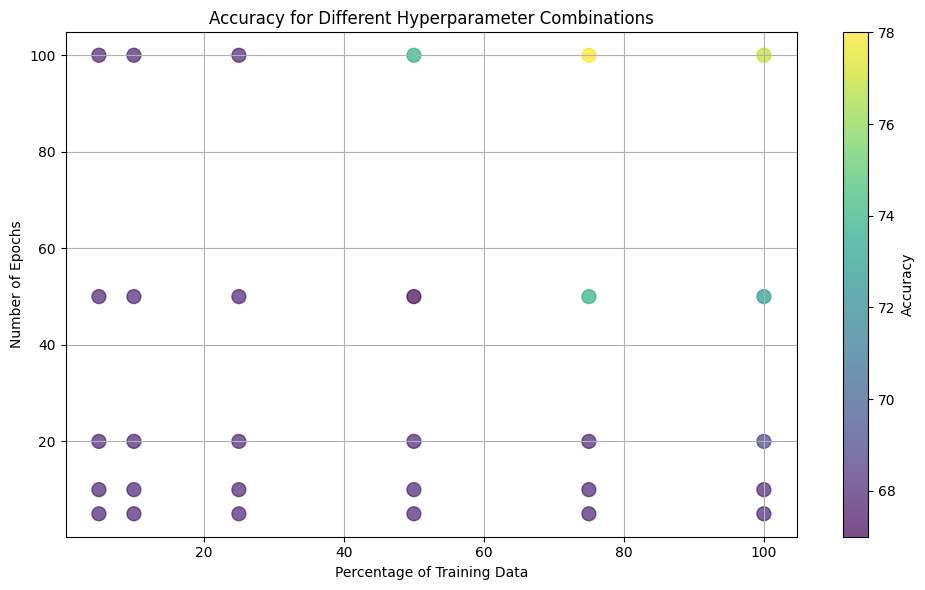

In [6]:
import matplotlib.pyplot as plt

# Fixed learning rate
learning_rate = 0.005

# Initialize lists to store results
percent_values = []
epochs_values = []
accuracy_values = []

# Iterate over all combinations of tr_percent and num_epochs
for percent in tr_percent:
    for epochs in num_epochs:
        # Subset the training dataset based on the specified percentage
        subset_size = int(len(instances_tr) * (percent / 100))
        subset_instances = instances_tr[:subset_size]

        # Train the perceptron
        weights = train_perceptron(subset_instances, learning_rate, epochs)

        # Evaluate the accuracy on the test dataset
        accuracy = get_accuracy(weights, instances_te)

        # Append values to lists
        percent_values.append(percent)
        epochs_values.append(epochs)
        accuracy_values.append(accuracy)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(percent_values, epochs_values, c=accuracy_values, cmap='viridis', s=100, alpha=0.7)
plt.colorbar(label='Accuracy')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Number of Epochs')
plt.title('Accuracy for Different Hyperparameter Combinations')
plt.grid(True)
plt.tight_layout()
plt.show()
